In [1]:
import matplotlib.pyplot as py
import numpy as np
import getdist as gs

$1^{\mathrm{st}}$ approx

In [2]:
Nrange = [N for N in range(60, 71)]
ns1 = []
r1 = []

for x in Nrange:
    r1.append(8/(x+0.5))
    ns1.append(1- (2/(x+0.5)))

$2^{nd}$ approximation

In [3]:
ns2 = []
r2 = []

for x in Nrange:
    r2.append(8/(x+0.5))
    ns2.append(1- (5/(x-0.5)))

NameError: name 'ns2' is not defined

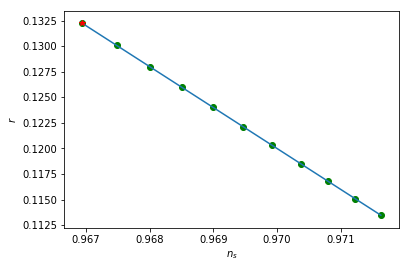

In [3]:
py.plot(ns1, r1, label = "$1^{st} \mathrm{approx}$")
py.scatter(ns1, r1, c = 'g')
py.ylabel('$r$')
py.xlabel('$n_s$')
py.plot(ns1[0], r1[0], 'r*', label = 'N = 60')

py.plot(ns2, r2, label = "$2^{nd} \mathrm{approx}$")
py.scatter(ns2, r2, c = 'k')
py.ylabel('$r$')
py.xlabel('$n_s$')
py.plot(ns2[0], r2[0], 'b*', label = 'N = 60 $2^{nd}$')

py.legend()

The first approximation looks better

# Using Plank data

In [4]:
import os
from getdist import plots, loadMCSamples
from pathlib import Path

In [5]:
#paths are written as the following
pathbase = "C:/Users/Jacob/Documents/aWarwicka/4th year Project/Python tasks/Getdist/base_r/plikHM_TTTEEE_lowl_lowE"
dirs = os.listdir(pathbase)
#os.listdir returns a list of strings
dirs[2], dirs[10]

('base_r_plikHM_TTTEEE_lowl_lowE.likelihoods',
 'base_r_plikHM_TTTEEE_lowl_lowE_1.txt')

In [6]:
basepth = "C:/Users/Jacob/Documents/aWarwicka/4th year Project/Python tasks/Getdist/base_r/plikHM_TTTEEE_lowl_lowE"
root = "base_r_plikHM_TTTEEE_lowl_lowE"

samps = loadMCSamples(os.path.join(basepth, root), settings={'ignore_rows':0.3})

C:/Users/Jacob/Documents/aWarwicka/4th year Project/Python tasks/Getdist/base_r/plikHM_TTTEEE_lowl_lowE\base_r_plikHM_TTTEEE_lowl_lowE_1.txt
C:/Users/Jacob/Documents/aWarwicka/4th year Project/Python tasks/Getdist/base_r/plikHM_TTTEEE_lowl_lowE\base_r_plikHM_TTTEEE_lowl_lowE_2.txt
C:/Users/Jacob/Documents/aWarwicka/4th year Project/Python tasks/Getdist/base_r/plikHM_TTTEEE_lowl_lowE\base_r_plikHM_TTTEEE_lowl_lowE_3.txt
C:/Users/Jacob/Documents/aWarwicka/4th year Project/Python tasks/Getdist/base_r/plikHM_TTTEEE_lowl_lowE\base_r_plikHM_TTTEEE_lowl_lowE_4.txt
Removed no burn in


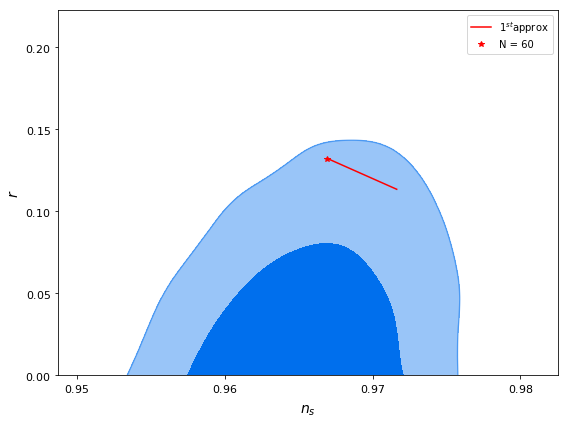

In [7]:
g = plots.get_single_plotter(chain_dir=Path(basepth), width_inch=8)
g.plot_2d(samps,'ns', 'r', filled=True);

py.plot(ns1, r1, c = 'r', label = "$1^{st} \mathrm{approx}$")
#py.scatter(ns1, r1, c = 'g')
py.ylabel('$r$')
py.xlabel('$n_s$')
py.plot(ns1[0], r1[0], 'r*', label = 'N = 60')

py.legend()

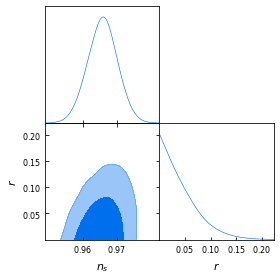

In [12]:
g = plots.get_subplot_plotter()
g.triangle_plot(samps, ['ns', 'r'], filled=True)

In [13]:
g.export('marginals.png')

Now we plot of different monomial potentials

In [9]:
Nrange = [N for N in range(60, 71)]

def params_for_k(k):
    ns = []
    r = []
    for N in Nrange:
        ns.append(1 - (0.5*k+1)/(N + 0.25*k))
        r.append((4*k)/(N+0.5))
    return (ns, r)

def plot_for_k(k, kstring):
    py.plot(params_for_k(k)[0], params_for_k(k)[1], label =  kstring)

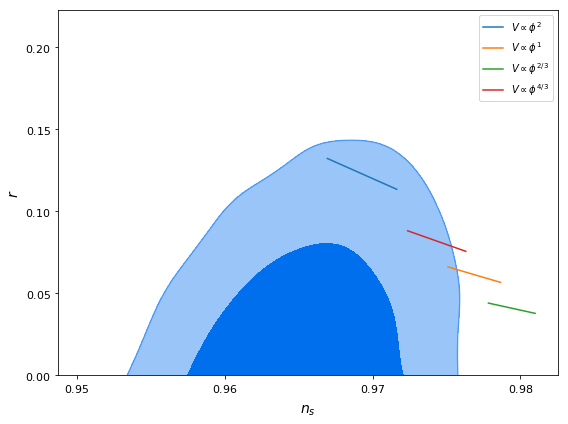

In [10]:
g = plots.get_single_plotter(chain_dir=Path(basepth), width_inch=8)
g.plot_2d(samps,'ns', 'r', filled=True);

#Function takes string input
plot_for_k(2, '$V \propto \phi ^{2}$')
plot_for_k(1, '$V \propto \phi ^{1}$')
plot_for_k(2/3, '$V \propto \phi ^{2/3}$')
plot_for_k(4/3, '$V \propto \phi ^{4/3}$')

py.legend()

In [11]:
g.export('SRcomparison.png')